<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/images/bogdanoff_cover.jpeg" height="150">

# Андан на экономе: домашнее задание 2
</center>


> [He bought? Dump it. He sold? Pump it.](https://www.youtube.com/watch?v=fDpYZU5FAVU)  <br>

$\qquad$ $\qquad$ $\qquad$ $\qquad$  📉 📉 📉**Bogdanoff**


## Общая информация


__Дата выдачи:__ 29.02.2024

__Мягкий дедлайн:__ 23:59MSK 24.03.2024

__Жесткий дедлайн:__ 23:59MSK 31.03.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

## Формат сдачи

Сам ноутбук называйте в формате hw-02-USERNAME.ipynb, где USERNAME — ваши фамилия и имя на латинице. Задание сдаётся в anytask.

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

#  Портфельная теория Марковица

В этом задании мы будем работать с данными по ценным бумагам. Мы немного поанализируем их и попробуем собрать оптимальный портфель.

- в таблице `stocks.csv` содержится информация об акциях нескольких компаний с $01.01.2014$ по $31.12.2023$ по дням.
- таблице `exchange_rates.csv` содержится информация о курсах валют _USD-RUB_, _EUR-RUB_ и _HKD-RUB_ за тот же период.

Подгрузим данные и посмотрим на них.

In [2]:
df_stocks = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/stocks.csv')
print(df_stocks.shape)
df_stocks.head()

(17572, 8)


,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер
0,29.12.2023,"192,53","193,90","194,40","191,73","42,67M","-0,54%",AAPL
1,28.12.2023,"193,58","194,14","194,66","193,17","33,83M","0,22%",AAPL
2,27.12.2023,"193,15","192,49","193,50","191,09","47,90M","0,05%",AAPL
3,26.12.2023,"193,05","193,61","193,89","192,83","28,81M","-0,28%",AAPL
4,22.12.2023,"193,60","195,18","195,41","192,97","37,15M","-0,55%",AAPL


In [3]:
df_rates = pd.read_csv('https://raw.githubusercontent.com/hse-econ-data-science/andan2024/main/hw/data/exchange_rates.csv')
print(df_rates.shape)
df_rates.head()

(3652, 4)


,Дата,EUR_RUB,USD_RUB,HKD_RUB
0,01.01.2014,"45,189","32,855","4,237"
1,02.01.2014,"45,254","33,1","4,269"
2,03.01.2014,"45,114","33,2","4,282"
3,04.01.2014,"45,125","33,248","4,288"
4,05.01.2014,"45,228","33,255","4,289"


## 1 Причешем данные

Часто при загрузке данных из каких-либо источников, особенно если они разные, у вас будет возникать необходимость в их форматировании. Поэтому в этой части потренируемся корректировать переменные для последующей работы с ними.


__а) [2 балла]__ В колонке `'Дата'` лежат дни, в которые осуществлялась торговля акциями. Превратите её в формат `datetime` в обеих таблицах.

In [4]:
df_stocks['Дата'] = pd.to_datetime(df_stocks['Дата'], dayfirst=True)
df_rates['Дата'] = pd.to_datetime(df_rates['Дата'], dayfirst=True)

__б) [5 баллов]__ Для продолжения работы необходимо перевести столбцы в числовой формат, однако они содержат некорректные символы, которые не позволят сделать это напрямую.

Допишите функцию, которая примет на вход тип данных `string` и:

- Уберет лишнюю точку, разделяющую тысячные разряды в числах (например, $2.024,01 \rightarrow 2024,01$)
- Заменит символ запятой, отделяющий десятичный разряд, на точку (например, $2024,01 \rightarrow 2024.01$)
- Уберет символы `%`, `'B'` (млрд), `'M'` (млн) и `'K'` (тыс)
- Затем изменит тип данных с `string` на `float`
- И домножит на $10^9$, если в исходном значении содержалась `'B'`, на $10^6$, если `'M'`, или на $10^3$, если `'K'`.

In [5]:
def correct_values(value: str):
    remove_list = ['%', 'B', 'M', 'K', '.']
    corrected_value = value
    for ch in remove_list:
        corrected_value = corrected_value.replace(ch, '')
    corrected_value = float(corrected_value.replace(',', '.'))

    if 'B' in value:
        corrected_value *= (10.0 ** 9)
    elif 'M' in value:
        corrected_value *= (10.0 ** 6)
    elif 'K' in value:
        corrected_value *= (10.0 ** 3)

    return corrected_value

Примените данную функцию к столбцам `'Цена', 'Откр.', 'Макс.', 'Мин.', 'Объём', 'Изм. %'` таблицы `df_stocks` и к столбцам `'EUR_RUB', 'USD_RUB', 'HKD_RUB'` таблицы `df_rates`.

__Hint:__ Для этого можно использовать метод `map` библиотеки `pandas`. Важно также указать параметр `na_action='ignore'`, чтобы пустые значения не передавались в функцию `correct_values`, [(ссылка на документацию).](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

In [6]:
df_stocks_col_to_correct = ['Цена', 'Откр.', 'Макс.', 'Мин.', 'Объём', 'Изм. %']
df_rates_col_to_correct = ['EUR_RUB', 'USD_RUB', 'HKD_RUB']

df_stocks[df_stocks_col_to_correct] = df_stocks[df_stocks_col_to_correct].applymap(correct_values, na_action='ignore')
df_rates[df_rates_col_to_correct] = df_rates[df_rates_col_to_correct].applymap(correct_values, na_action='ignore')

__в) [5 баллов]__ Поскольку акции компаний торгуются на разных биржах, цены также указаны в различных валютах.
Давайте приведем все к рублям, используя таблицу `df_rates`. Для этого важно знать, что данные по тикерам:

- `'AAPL'` и `'MSFT'` собраны в долларах `USD`
- `'MBGn'` и `'BMWG'` $-$ в евро `EUR`
- `'Tencent'` $-$ в Гонконгских долларах `HKD`
- по остальным $-$ в `RUB`

Давайте сначала объединим таблицы, выполнив операцию `left join` таблицы `df_stocks` с `df_rates` по столбцу `'Дата'`. Для этого будем использовать метод `merge`, [(ссылка на документацию).](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [7]:
df_merged = df_stocks.merge(df_rates, how='left', on='Дата')

df_merged.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
0,2023-12-29,192.53,193.90,194.40,191.73,42670000.0,-0.54,AAPL,98.596,90.36,11.429
1,2023-12-28,193.58,194.14,194.66,193.17,33830000.0,0.22,AAPL,97.919,89.36,11.325
2,2023-12-27,193.15,192.49,193.50,191.09,47900000.0,0.05,AAPL,101.779,91.27,11.731
3,2023-12-26,193.05,193.61,193.89,192.83,28810000.0,-0.28,AAPL,101.455,91.66,11.734
4,2023-12-22,193.60,195.18,195.41,192.97,37150000.0,-0.55,AAPL,101.467,92.00,11.791


 Затем преобразуем столбцы `'Цена', 'Откр.', 'Макс.', 'Мин.'`, умножив их на соответствующий данной акции курс.

In [8]:
stocks_currency_dict = {
    "AAPL": "USD_RUB",
    "MSFT": "USD_RUB",
    "MBGn": "EUR_RUB",
    "BMWG": "EUR_RUB",
    "Tencent": "HKD_RUB",
}

for ticker, curr_pair in stocks_currency_dict.items():
    df_merged.loc[df_merged['Тикер'] == ticker, ['Цена', 'Откр.', 'Макс.', 'Мин.']] = df_merged.loc[df_merged['Тикер'] == ticker, ['Цена', 'Откр.', 'Макс.', 'Мин.']].mul(df_merged[curr_pair], axis=0)

df_merged.head()

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,Тикер,EUR_RUB,USD_RUB,HKD_RUB
0,2023-12-29,17397.0108,17520.8040,17565.9840,17324.7228,42670000.0,-0.54,AAPL,98.596,90.36,11.429
1,2023-12-28,17298.3088,17348.3504,17394.8176,17261.6712,33830000.0,0.22,AAPL,97.919,89.36,11.325
2,2023-12-27,17628.8005,17568.5623,17660.7450,17440.7843,47900000.0,0.05,AAPL,101.779,91.27,11.731
3,2023-12-26,17694.9630,17746.2926,17771.9574,17674.7978,28810000.0,-0.28,AAPL,101.455,91.66,11.734
4,2023-12-22,17811.2000,17956.5600,17977.7200,17753.2400,37150000.0,-0.55,AAPL,101.467,92.00,11.791


Наконец, мы закончили с первичными преобразованиями и можем приступать к дальнейшему анализу.

## 2 Начало работы с данными

__а) [2 балла]__ Посмотрите наличие пропусков в данных таблицы `df_merged`. Информация по каким тикерам и за какой период отсутствует? Удалите строки с пропущенными данными.

In [9]:
print(f'Количество пропущенных значений: {df_merged.isna().sum()}')

df_merged.loc[df_merged['Объём'].isna(), ['Тикер', 'Дата']]

Количество пропущенных значений: Дата       0
Цена       0
Откр.      0
Макс.      0
Мин.       0
Объём      9
Изм. %     0
Тикер      0
EUR_RUB    0
USD_RUB    0
HKD_RUB    0
dtype: int64


,Тикер,Дата
1974,AAPL,2016-02-27
2800,BMWG,2022-11-21
2944,BMWG,2022-05-03
2945,BMWG,2022-05-02
7838,MBGn,2022-11-21
7981,MBGn,2022-05-04
7982,MBGn,2022-05-03
7988,MBGn,2022-04-25
17313,Tencent,2015-01-17


In [10]:
df_merged.dropna(inplace=True)
print(f'Количество пропущенных значений: {df_merged.isna().sum().sum()}')

Количество пропущенных значений: 0


__б) [2 балла]__ Какое количество уникальных тикеров содержится в таблице `df_stocks`?

In [11]:
print(f"В таблице {len(df_stocks['Тикер'].unique())} уникальных тикеров")

В таблице 7 уникальных тикеров


__в) [2 балла]__  Для каких акций и в какой временной период была зафиксирована наибольшая разность между значениями `'Макс.'` и `'Мин.'` в рублях?

In [12]:
#https://stackoverflow.com/questions/42234039/getting-the-row-with-max-value-in-pandas
print('10 акций с наибольшим размахом цен:')
df_merged.loc[(df_merged['Макс.'] - df_merged['Мин.']).isin((df_merged['Макс.'] - df_merged['Мин.']).nlargest(10)), ['Тикер', 'Дата', 'Макс.', 'Мин.']]

10 акций с наибольшим размахом цен:


,Тикер,Дата,Макс.,Мин.
10134,MSFT,2023-10-26,32099.55480,30719.28240
10148,MSFT,2023-10-06,33051.00519,31756.83630
10178,MSFT,2023-08-24,31588.14770,30353.00540
10205,MSFT,2023-07-18,33340.30200,31103.25300
10546,MSFT,2022-03-08,36204.90000,34425.00000
10547,MSFT,2022-03-07,41425.67000,39829.79000
10554,MSFT,2022-02-24,24807.60768,22820.71296
10576,MSFT,2022-01-24,23408.10846,21748.87530
10582,MSFT,2022-01-13,24475.44288,23187.90400
11046,MSFT,2020-03-13,11756.77083,10218.82749


__г) [2 балла]__  В какие периоды было продано/куплено акций на наибольшую сумму рублей. Какие это были акции?

__Hint__: Объем — это количество проданных/купленных акций

In [13]:
print('10 акций с наибольшей суммой покупки/продажи:')
df_merged.loc[(df_merged['Объём'] * df_merged['Цена']).isin((df_merged['Объём'] * df_merged['Цена']).nlargest(10)), ['Тикер', 'Дата', 'Объём', 'Цена']]

10 акций с наибольшей суммой покупки/продажи:


,Тикер,Дата,Объём,Цена
456,AAPL,2022-03-08,131150000.0,20073.60000
482,AAPL,2022-01-28,179940000.0,13256.44324
510,AAPL,2021-12-17,195920000.0,12687.12162
808,AAPL,2020-10-13,262330000.0,9330.63390
834,AAPL,2020-09-04,332610000.0,9121.47264
843,AAPL,2020-08-24,345940000.0,9394.19040
844,AAPL,2020-08-21,338050000.0,9302.87600
858,AAPL,2020-08-03,308150000.0,7965.14810
859,AAPL,2020-07-31,374300000.0,7906.91286
10099,MSFT,2023-12-15,78500000.0,33467.65075


__д) [5 баллов]__  В столбике `'Изм. %'` лежат изменения стоимости ценных бумаг в процентах. При этом для каждой бумаги валюта своя.

Найдите 5 дат, в которые наблюдались наибольшие средние процентные изменения стоимости акций в абсолютном выражении.

__Hint:__ От изменения акций надо взять модуль, а затем посчитать среднее по тикерам для каждой даты.

In [14]:
df_dates_percent = df_merged[['Дата', 'Изм. %']].copy()
df_dates_percent['Изм. %'] = abs(df_dates_percent['Изм. %'])
df_dates_percent = df_dates_percent.pivot_table(index='Дата', values='Изм. %', aggfunc='mean')

top_5_diff = df_dates_percent.nlargest(5, columns='Изм. %')

__е) [2 балла]__ Сохраните ответ в переменную `top_5_diff` в виде таблички:

| Дата     | Изм. % |
|----------|--------|
| 01/01/01 |   1   |
|    ...   |  ...  |
| 03/01/01 |   3   |

In [15]:
top_5_diff

,Изм. %
Дата,
2022-02-24,13.081429
2016-02-29,11.840000
2020-03-24,10.795714
2020-03-12,10.615714
2022-02-21,9.128000


__ё) [5 баллов]__ Далее мы будем работать только со средними ценами, поэтому имеет смысл перевести таблицу из длинного формата в широкий

Было:

| Дата     | Цена | Тикер |
|----------|------|-------|
| 01/01/01 |  10  |   A   |
| 02/01/01 |  20  |   A   |
| 03/01/01 |  30  |   A   |
|   ...    | ...  |  ...  |
| 01/01/01 |  15  |   B   |
| 02/01/01 |  30  |   B   |
| 03/01/01 |  60  |   B   |
|   ...    | ...  |  ...  |

Станет:

| Дата     | Цена A | Цена B | ... |
|----------|--------|--------|-----|
| 01/01/14 |   10   |   15   | ... |
| 02/01/14 |   20   |   30   | ... |
| 03/01/14 |   30   |   60   | ... |
|   ...    |  ...   |  ...   | ... |


Это можно сделать по-разному, например, с помощью `pivot_table` ([ссылка](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) на документацию)

In [16]:
df = df_merged.pivot_table(index='Дата', values='Цена', columns='Тикер', aggfunc='mean')

df.head()

Тикер,AAPL,BMWG,GAZP,MBGn,MSFT,Tencent,VTBR
Дата,,,,,,,
2014-01-02,653.72500,3780.51916,NaN,2789.90910,1229.99600,418.02048,NaN
2014-01-03,641.42400,3788.67372,NaN,2784.88722,1225.41200,410.55816,NaN
2014-01-06,645.27030,3756.04441,135.47,2785.23886,1199.87730,411.98177,0.04846
2014-01-07,639.27060,3770.02665,NaN,2815.67520,1206.62740,409.79112,NaN
2014-01-08,643.96557,3803.54355,137.33,2801.87619,1186.40952,416.51786,0.04791


__ж) [5 баллов]__  Для всех тикеров из таблички `df` постройти картинки с динамикой цен во времени, а также нистограммы цен. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы?

__Ответ:__
- Распределение цен большинства акций не похоже на нормальное. Судя по графику, более менее близкие акции к нормальному распределению по ценам - это MBGn и BMWG, остальные имеют либо значительные смещения в меньшую сторону, либо большую концентрацию (как GAZP)
- В целом рынок рос. Наибольший рост в рублёвом выражении показали американские акции - AAPL и MSFT. Меньший рост в рублевом выражении показали немецкие акции - BMWG и MBGn (при том, что в 2014 их стоимость была выше американских). Наименьший рост показали российские акции. Также на графике виден кризис 2022 года.

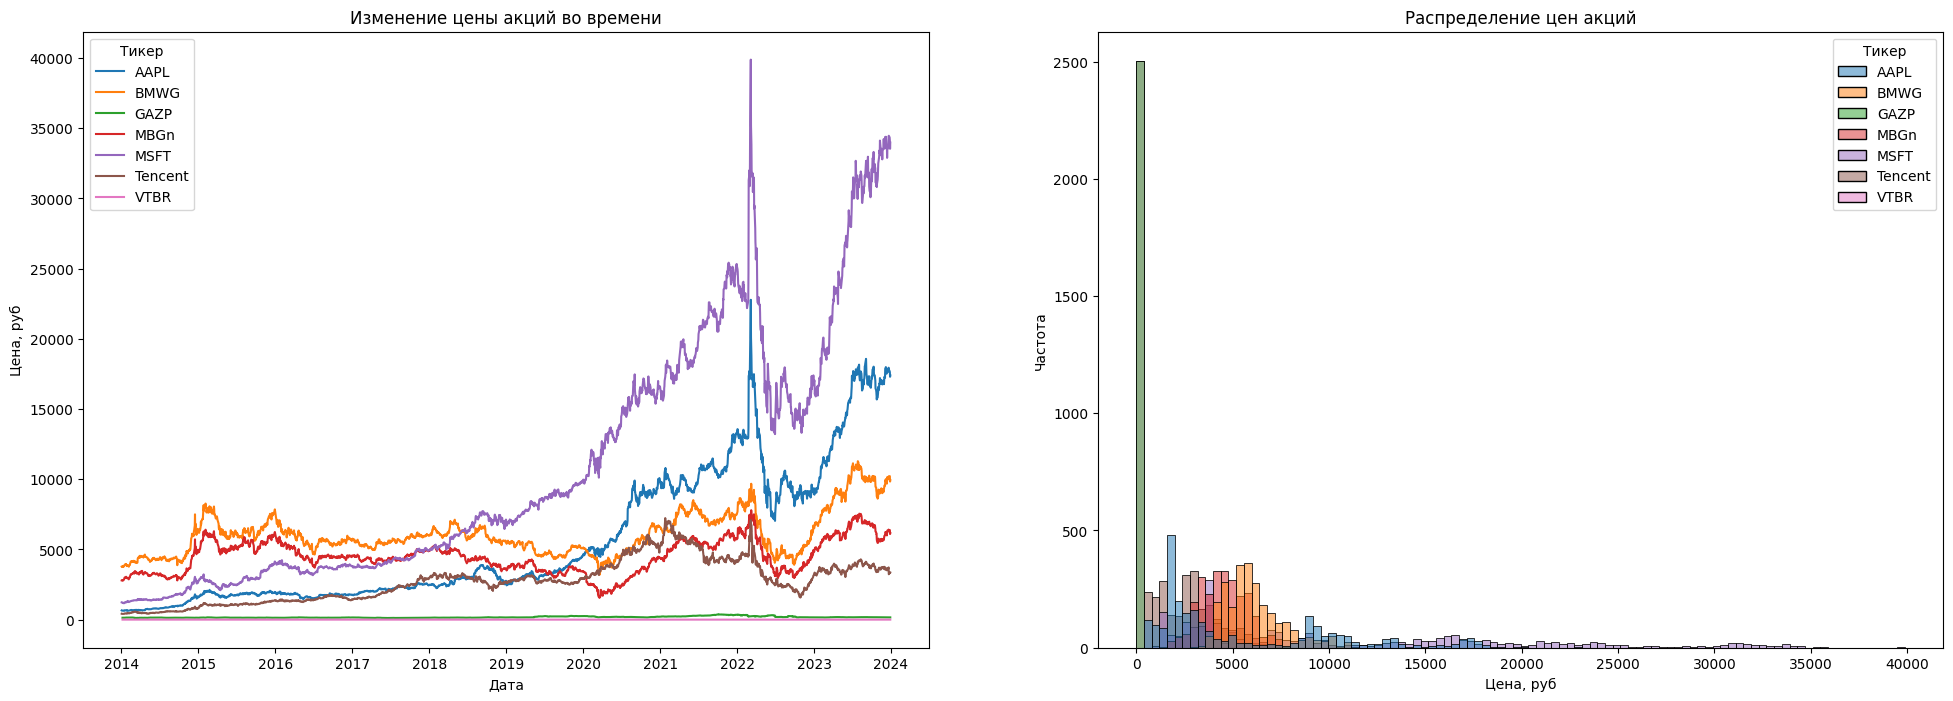

In [39]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(24, 8))

sns.lineplot(data=df, ax=axs[0], dashes=False)
sns.histplot(data=df, ax=axs[1], bins=100)

axs[0].set_xlabel('Дата')
axs[0].set_ylabel('Цена, руб')
axs[0].set_title('Изменение цены акций во времени')
axs[1].set_xlabel('Цена, руб')
axs[1].set_ylabel('Частота')
axs[1].set_title('Распределение цен акций')
plt.show()

Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени:

$$
R_t = \left( \frac{P_t}{P_{t-1}} - 1 \right) \cdot 100\%.
$$

Под риском обычно имеют в виду стандартное отклонение.


__з) [5 баллов]__  Рассчитайте процентное изменение цены акций в рублях ото дня ко дню для `df`. Полученную таблицу доходностей сохраните в переменную `df_pct_change`.

__Hint__: С этим поможет метод `pct_change()`, [(ссылка на документацию).](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html)

In [18]:
df_pct_change = df.pct_change()

__и) [5 баллов]__  Для всех тикеров из таблички `df_pct_change` постройти картинки с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение?
- Видно ли по ящику с усами, что в данных довольно много выбросов?

__Ответ:__
- Судя по гистограмме, доходность имеет распределение, близкое к нормальному: в нуле виден пик, ближе к 0.1 частота падает с убывающим темпом.
- Да, каждая акция имеет большое количество выбросов, что может говорить о большом количестве кратковременных шоков на финансовом рынке.

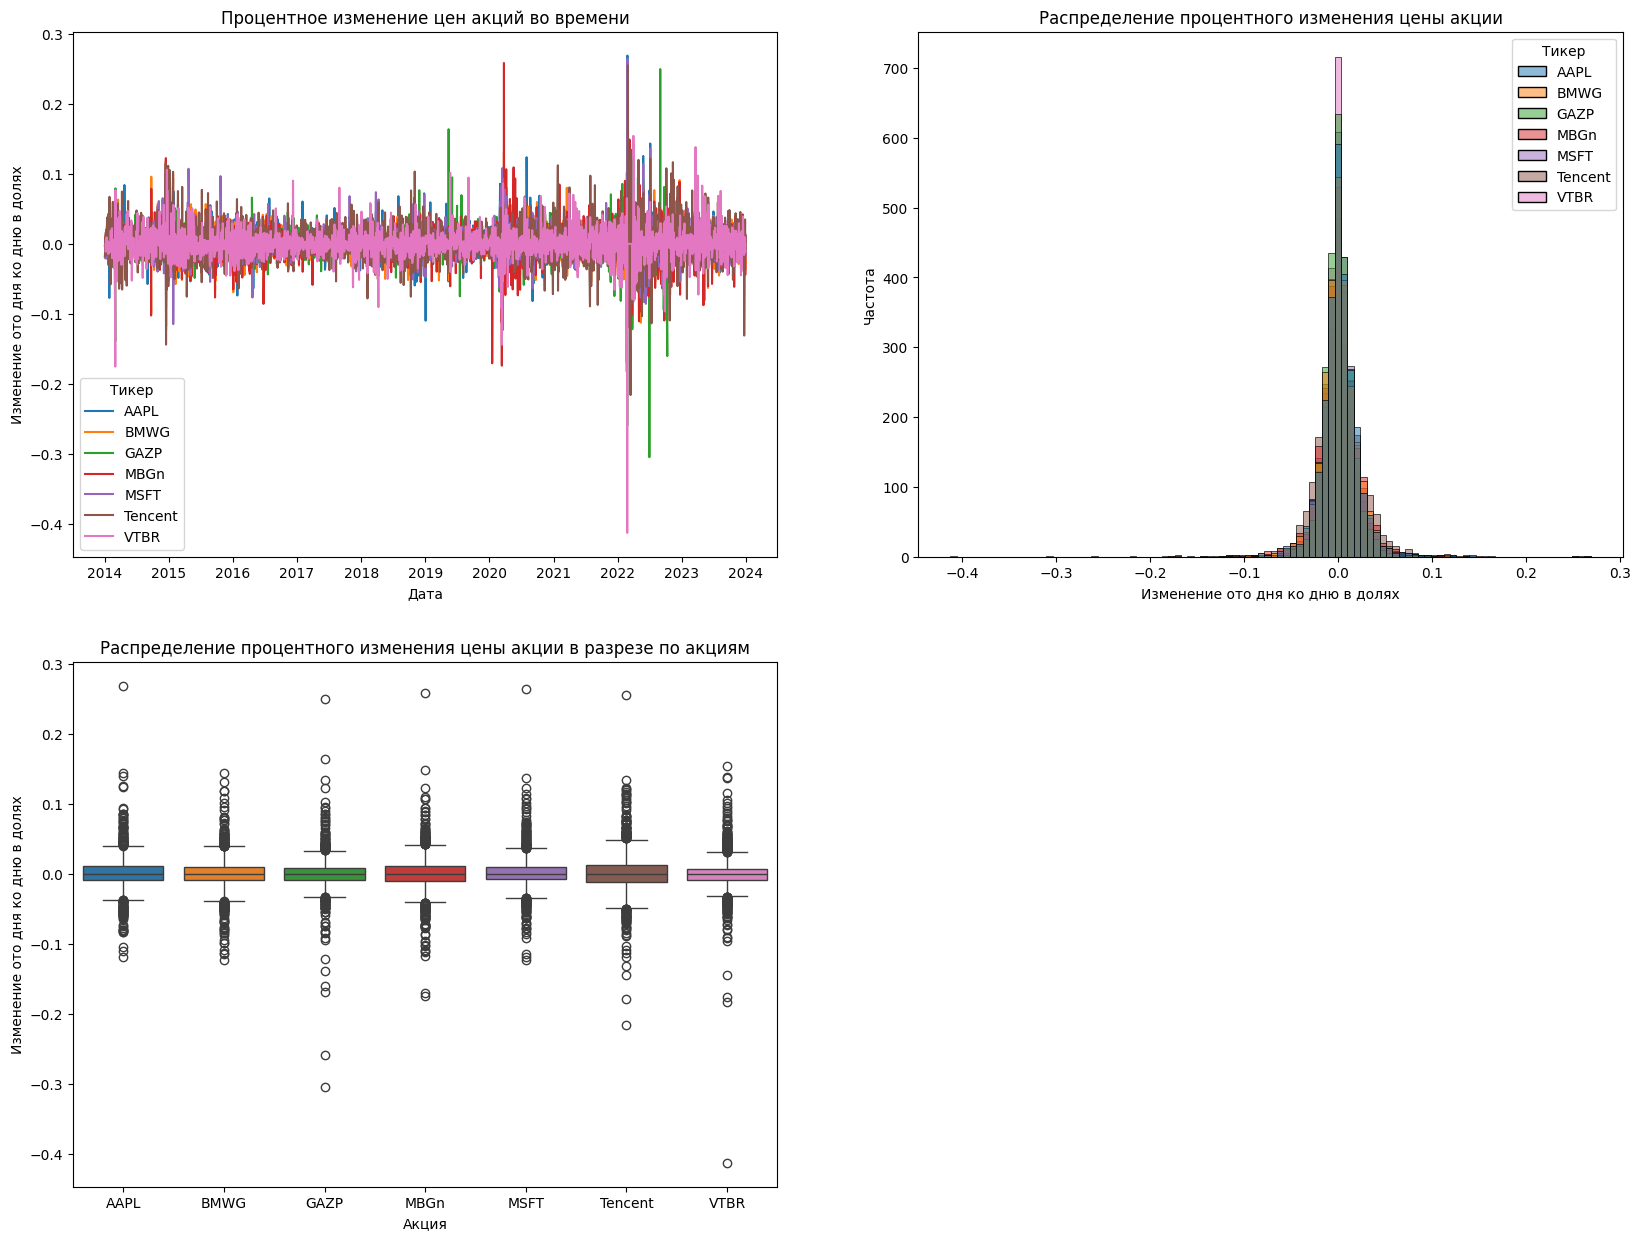

In [19]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 15))
axs = ax.flatten()

sns.lineplot(data=df_pct_change, ax=axs[0], dashes=False)
sns.histplot(data=df_pct_change, ax=axs[1], bins=100)
sns.boxplot(data=df_pct_change, ax=axs[2])
axs[3].remove()

ax_title = 'Изменение ото дня ко дню в долях'

axs[0].set_title('Процентное изменение цен акций во времени')
axs[0].set_ylabel(ax_title)

axs[1].set_title('Распределение процентного изменения цены акции')
axs[1].set_xlabel(ax_title)
axs[1].set_ylabel('Частота')

axs[2].set_title('Распределение процентного изменения цены акции в разрезе по акциям')
axs[2].set_ylabel(ax_title)
axs[2].set_xlabel('Акция')

plt.show()

__к) [5 баллов]__  В пункте __д)__ мы нашли даты, в которые наблюдались наибольшие измения стоимости ценых бумаг. При расчётах мы проигнорировали колебания курсов валют.

Давайте посмотрим, каким бы было колебание цен акций в абсолютном выражении для дат из таблички `top_5_diff`, если бы мы учли изменения курсов валют.

В таблице `df_pct_change` все доходности измерены в рублях. Посчитайте для этой таблицы построчное среднее для абсолютных значений изменений.

In [67]:
df_pct_change_means = abs(df_pct_change).mean(axis=1)
df_pct_change_means

Дата
2014-01-02         NaN
2014-01-03    0.008870
2014-01-06    0.007808
2014-01-07    0.004984
2014-01-08    0.011341
                ...   
2023-12-25    0.002249
2023-12-26    0.001725
2023-12-27    0.009241
2023-12-28    0.019736
2023-12-29    0.007881
Length: 2607, dtype: float64

Оставьте только те даты, которые встречаются в `top_5_diff`, и добавить их в качестве нового столбца `'Изм. (RUB) %'`

__Hint__: Чтобы выделить список необходимых дат из таблички `top_5_diff`, можно воспользоваться методом `to_list()` применительно к столбцу `'Дата'`. Такой список можно дальше использовать при обращении к строкам в `'[...]'`.

In [68]:
top_5_diff['Изм. (RUB) %'] = df_pct_change_means.loc[top_5_diff.index] * 100

top_5_diff

,Изм. %,Изм. (RUB) %
Дата,,
2022-02-24,13.081429,12.677837
2016-02-29,11.840000,1.631587
2020-03-24,10.795714,9.703503
2020-03-12,10.615714,9.195150
2022-02-21,9.128000,5.438385


In [64]:
df_rates.set_index('Дата')[['EUR_RUB', 'USD_RUB', 'HKD_RUB']].select_dtypes(np.number).pct_change().loc[df_rates.set_index('Дата').index.isin(top_5_diff.index)] * 100

,EUR_RUB,USD_RUB,HKD_RUB
Дата,,,
2016-02-29,-1.577037,-1.678199,-1.786439
2020-03-12,1.806034,2.654309,2.208068
2020-03-24,-1.143359,-1.630776,-1.243391
2022-02-21,0.089851,-0.536986,-0.281937
2022-02-24,3.656001,3.573717,3.529864


__л) [2 балла]__  Проинтерпретируете уменьшение/увеличение процентного изменения стоимости акций при пересчете по курсу в рубли.

__Ответ:__ Я посмотрел на процентные изменение курсов валют ото дня ко дню и не наблюдаю связи разницы процентного изменения цен в разных валютах с колебаниями курса

## 3 Составляем портфель


Финансовые продукты описываются двумя характеристиками: __доходностью__ и __риском__.

Доходность — это процентное изменение стоимости за некоторый промежуток времени. Под риском, как правило, понимается стандартное отклонение доходности акций.

Однако когда речь идет о нескольких акциях в портфеле, то необходимо учитывать, как связана динамика цен на эти акции: падение доходности одной из акций может быть компенсировано ростом другой. Такой портфель будет предпочтительнее, поскольку предлагает меньшие риски для инвестора.

Осталось найти то самое сладкое сочетание активов... Для поиска оптимальных весов активов в портфеле обычно решается __задача оптимизации.__

Мы поступим проще:

- Будем рассматривать портфель, состоящий всего из 2 тикеров: `'AAPL'` и `'Tencent'`.
- Наилучшее сочетание весов будем искать неоптимальным способом, тупо перебирая различные варианты.

Пусть мы вкладываем долю нашего бюджета $w$ в первую ценную бумагу, а долю $(1 - w)$ во вторую. Тогда ожидаемая доходность порфеля составит

$$
\mathbb{E}(R) = w \cdot \mathbb{E}(R_1)  + (1 - w) \cdot \mathbb{E}(R_2).
$$

Дисперсия портфеля будет равна

$$
\text{Var}(R) = w^2 \cdot \text{Var}(R_1)  + (1 - w)^2 \cdot \text{Var}(R_2) + 2 \cdot w \cdot \text{Cov}(R_1, R_2).
$$

Ковариацию, по её определению, можно переписать как

$$
\text{Cov}(R_1, R_2) = \text{Corr}(R_1, R_2) \cdot \sigma(R_1) \cdot \sigma(R_2),
$$

где $\sigma(R_i) = \sqrt{ \text{Var}(R_i)}$.


Для начала создадим веса, которые будем рассматривать.

__а) [2 балла]__ С помощью функции `np.arange()` создайте `array` от $0$ до $1$ с шагом $0.01$ [(ссылка на документацию).](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

In [22]:
w = np.arange(0, 1, 0.01)

Теперь запишем необходимые характеристики акций в соответствующие переменные:

__б) [3 балла]__ В переменные `r1` и `r2` сохраните среднюю доходность акций `'AAPL'` и `'Tencent'` из `df_pct_change`. Убедитесь, что доходности представлены не в процентах, а в виде чисел. Например не $10\%$, а $0.1$.

Кроме того, поскольку стандартной мерой доходности является годовая доходность, преобразуем среднюю ежедневную доходность в годовую, используя формулу сложного процента для полученных значений:

$$
r_{\text{год}} = (1 + r_{\text{день}})^{252} - 1,
$$

где:
- $r_{\text{год}}$ - ожидаемая годовая доходность,
- $r_{\text{день}}$ - средняя ежедневная доходность,
- $252$ - количество торговых дней в году (для большинства финансовых рынков).

In [23]:
r1 = (1 + df_pct_change['AAPL'].mean()) ** 252 - 1
r2 = (1 + df_pct_change['Tencent'].mean()) ** 252 - 1

__в) [3 балла]__ Аналогично сохраните стандартные отклонения доходности этих акций в `sd1` и `sd2`. Преобразуйте эти значения из дневных в годовые:

$$
\sigma_{\text{год}} = \sigma_{\text{день}} \times \sqrt{252}
$$

Где:
- $\sigma_{\text{год}}$ - годовая волатильность,
- $\sigma_{\text{день}}$ - ежедневная волатильность,
- $252$ - количество торговых дней в году (для большинства финансовых рынков).

Эта формула основана на предположении, что ежедневные доходности распределены независимо и одинаково. В реальности рыночные условия могут влиять на точность этого преобразования, но это общепринятый метод для оценки годовой волатильности на основе ежедневных данных.

In [24]:
sd1 = df_pct_change['AAPL'].std() * (252 ** 0.5)
sd2 = df_pct_change['Tencent'].std() * (252 ** 0.5)

__в) [1 балл]__ В переменную `rho` сохраните корреляцию между акциями.

In [25]:
rho = df_pct_change['AAPL'].corr(df_pct_change['Tencent'])

Теперь посчитаем доходность и волатильность портфеля, используя соответствующие формулы

In [26]:
r_p2 = w * r1 + (1 - w) * r2
sd_p2 = np.sqrt(w**2 * sd1**2 + (1 - w)**2 * sd2**2 + 2 * w * (1 - w) * rho * sd1 * sd2)

__г) [5 баллов]__ Постройте линейный график в осях (`sd_p2`, `r_p2`)

__Hint:__ Можно сделать с помощью `plt.plot(x, y)`

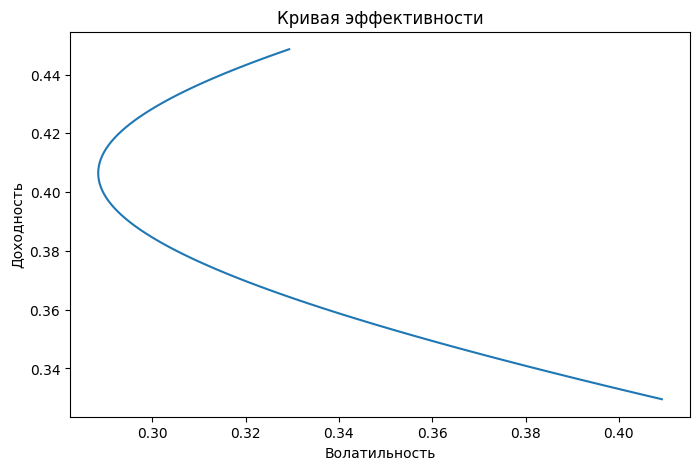

In [27]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(sd_p2, r_p2)
ax.set_xlabel('Волатильность')
ax.set_ylabel('Доходность')
ax.set_title('Кривая эффективности')
plt.show()

Получившаяся у вас картинка должна быть похожа на такую:

<center>
<img src="https://investprofit.info/wp-content/uploads/2018/08/Frontier1.png" height="450">
</center>

В портфельной теории Марковица эта кривая называется эффективной границей (или кривой эффективностию). Её можно поделить на три зоны:

- **Эффективная граница (Efficient Frontier)** — это часть кривой, которая лежит выше портфеля с минимальной дисперсией (риском). Портфели на этом участке предлагают наилучшее сочетание риска и доходности. Другими словами, для любого данного уровня риска, портфели на эффективной границе предлагают максимальную возможную доходность.
- **Портфели ниже эффективной границы** считаются неэффективными, так как для того же уровня риска можно добиться большей доходности.
- **Портфели выше эффективной границы** обычно не существуют, так как они предполагали бы получение более высокой доходности при том же уровне риска.

Найдем портфель с минимальной дисперсией (риском).

__д) [3 балла]__ Для этого сначала создадим табличку со столбцами `'Вес'`, `'Риск'` и `'Доходность'` (содержащими `w`, `sd_p2` и `r_p2` соответственно)

In [28]:
df_r = pd.DataFrame({'Вес': w, 'Риск': sd_p2, 'Доходность': r_p2})

__е) [3 балла]__ Теперь найдем портфель с минимальным риском и запишем его в переменную `min_sd_p`, а само значение минимального риска в `min_sd`

In [29]:
min_sd = df_r['Риск'].min()
min_sd_p = df_r[df_r['Риск'] == min_sd]

__ж) [3 балла]__ Выберем множество эффективных портфелей из `df_r`, тех, чья доходность и риск выше, чем у `min_sd_p` и сохраним их в `df_eff_p`

In [30]:
df_eff_p = df_r.loc[df_r['Доходность'] > min_sd_p['Доходность'].iloc[0]]

__з) [3 балла]__ А теперь на основе `df_eff_p` построим эффективную границу, о которой шла речь раньше (часть кривой выше портфеля с наименьшей волатильностью)

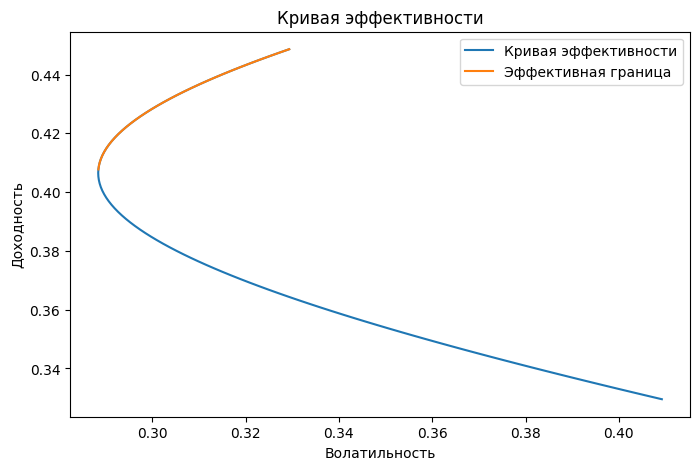

In [31]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(sd_p2, r_p2)
ax.plot(df_eff_p['Риск'], df_eff_p['Доходность'])
ax.set_xlabel('Волатильность')
ax.set_ylabel('Доходность')
ax.set_title('Кривая эффективности')
ax.legend(['Кривая эффективности', 'Эффективная граница'])
plt.show()

Выше мы говорили, что для поиска оптимального портфеля необходимо решать задачу оптимизации. Целевую функцию для её решения можно определить по-разному. Выше мы занимались минимизацией риска и нашли `min_sd_p`.

Кроме минимизации риска можно попытаться максимизировать **коэффициент Шарпа.** Он рассчитывается по формуле

$$
SR = \frac{r_{p} - r_{f}}{\sigma_{p}},
$$

где $r_{p}$  —  ожидаемая доходность портфеля, $r_{f}$  —  безрисковая ставка доходности, $\sigma_{p}$ — стандартное отклонение доходности портфеля.

Коэффициент Шарпа отражает премию за принятый риск. Любая инвестиционная стратегия, демонстрирующая более крутой наклон кривой Шарпа, предлагает более высокую ожидаемую доходность для данного уровня риска. Следовательно, более высокий коэффициент Шарпа всегда предпочтительнее, независимо от того, какой уровень риска вы готовы принять.

В качестве безрисковой ставки доходности выберем доходность российских государственных облигаций сроком 10 лет (можно посмотреть [тут](https://cbr.ru/hd_base/zcyc_params/))

In [32]:
r_f = 11.8/100

__и) [3 балла]__ Теперь у нас есть возможность рассчитать коэффициент Шарпа для кадждого портфеля в `df_r`. Для этого необходимо вычесть из доходности портфеля безрисковую ставку (`r_f`) и разделить на волатильность (риск) портфеля. Сохраните полученные значения в столбец `'Sharp'` таблицы `df_r`

In [33]:
df_r['Sharp'] = (df_r['Доходность'] - r_f) / df_r['Риск']

__и) [3 балла]__ Определите портфель с максимальным коэффициентом Шарпа, сохраните его в переменную `max_sharp_p`, а значение самого коэффициента - в переменную `max_sharp`

In [34]:
max_sharp = df_r['Sharp'].max()
max_sharp_p = df_r[df_r['Sharp'] == max_sharp]

In [35]:
max_sharp, max_sharp_p

(1.0347718978386065,
      Вес      Риск  Доходность     Sharp
 81  0.81  0.298598    0.426981  1.034772)

Рассмотрим прямую в осях (Риск - Доходность), выраженную формулой

$$ r = max\_sharp \cdot \sigma + r_f $$

Для того, чтобы ее провести, нам необходимо задать хотя бы 2 точки. Чтобы построенный график хорошо выглядел, рассмотрим $\sigma$, равную:

1. наименьшему значению риска портфелей на эффективной кривой (`min_sd`)
2. значению риска, соответствующего портфелю с наибольшим значением коэффициента Шарпа (из `max_sharp_p`)

__к) [3 балла]__ В переменную `sigma` сохраните `numpy.array` с двумя перечисленными выше значениями

In [36]:
sigma = np.array([min_sd, max_sharp_p['Риск'].iloc[0]])

__л) [3 балла]__ В переменную `r` сохраните значения доходности, находящиеся на указанной прямой, для значений риска из `sigma` (необходимо использовать формулу прямой)

In [37]:
r = max_sharp * sigma + r_f

__м) [5 баллов]__ Теперь построим эффективную границу, что мы уже делали ранее, и проведем указанную прямую (вернее ее часть).

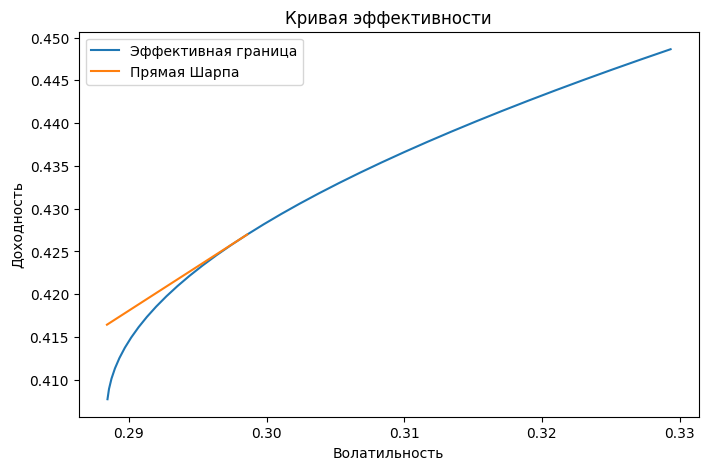

In [38]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(df_eff_p['Риск'], df_eff_p['Доходность'])
ax.plot(sigma, r)
ax.set_xlabel('Волатильность')
ax.set_ylabel('Доходность')
ax.set_title('Кривая эффективности')
ax.legend(['Эффективная граница', 'Прямая Шарпа'])
plt.show()

Полученная прямая является касательной к эффективной кривой, а точка ее касания представляет собой так называемый тангенциальный портфель.

Каждая точка на прямой Шарпа представляет собой портфель, состоящий из комбинации безрискового актива (в нашем случае, государственных облигаций) и рыночного портфеля (здесь, сочетание двух акций).

Все портфели на прямой Шарпа считаются эффективными в смысле оптимального соотношения риска и доходности. Это означает, что для любого данного уровня риска портфель на этой линии предоставляет максимально возможную доходность.

__н) [3 балла]__ Проинтерпретируйте численное значение наибольшего коэффициента Шарпа (`max_sharp`)

**Ответ:** Наибольшее значение коэффициента Шарпа равно 1.035. Это означает, что вложившись в портфель, в котором 81% приходится на акции Apple, агент получает премию за риск, равную 3.5% на "единицу" риска.

Таким образом, мы немного углубились в портфельную теорию и рассмотрели 2 основных метода оптимизации структуры портфеля:
- поиск наименее волатильного (рискового) портфеля
- поиск портфеля с оптимальным соотношением доходности и риска.